In [24]:
import pandas as pd
import os
import numpy as np
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import itertools
from sklearn import metrics
from sklearn import preprocessing


TrainData = pd.read_csv('UNSW_NB15_training-set_csc215.csv')
print(accuracy)

In [25]:
train_data=TrainData.drop(['service','attack_cat','id','proto','state'],axis=1)

In [26]:
y = train_data["label"].copy()
x = train_data.drop("label", axis=1)

x.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,1,1,1,1,0,0,0,1,1,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,1,1,1,2,0,0,0,1,6,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,2,1,1,3,0,0,0,2,6,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,2,1,1,3,1,1,0,2,1,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,2,2,1,40,0,0,0,2,39,0


In [27]:
clf = RandomForestClassifier(max_depth=13,random_state=1)

clf.fit(x,y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=13, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

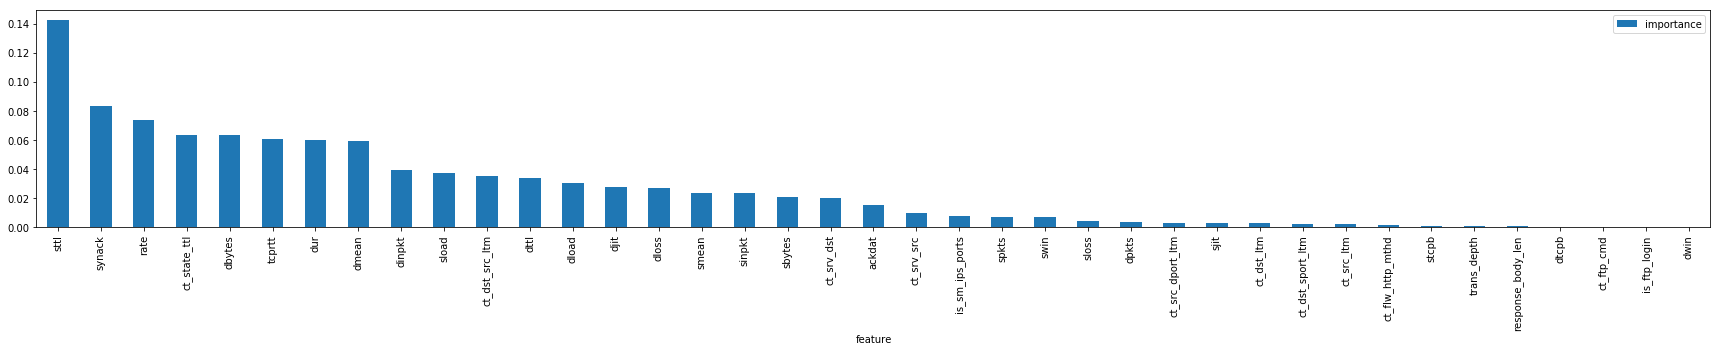

In [28]:
score= np.round(clf.feature_importances_,5)
importances = pd.DataFrame({'feature': x.columns ,'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
plt.rcParams['figure.figsize']= (30,4)
importances.plot.bar();

In [29]:
x_Norm = x.values #returns a numpy array
Norm = preprocessing.Normalizer()
x_scaled = Norm.fit_transform(x_Norm)
x= pd.DataFrame(x_scaled)


In [30]:
x_train = x.values
y_train = y.values


# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1)

# fit the model with data
logreg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
TestData = pd.read_csv('UNSW_NB15_test-set_csc215.csv')
TestData=TestData.drop(['service','attack_cat','id','proto','state'],axis=1)
TestData_neural = TestData


y_test = TestData["label"].copy()
x_test = TestData.drop("label", axis=1)
y_pred = logreg.predict(x_test)


accuracy = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
classification = metrics.classification_report(y_test, y_pred)
 

In [32]:
print(confusion_matrix)
print(classification)
print(accuracy)

[[32343  4657]
 [15615 29717]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.76     37000
           1       0.86      0.66      0.75     45332

   micro avg       0.75      0.75      0.75     82332
   macro avg       0.77      0.76      0.75     82332
weighted avg       0.78      0.75      0.75     82332

0.7537773891075159


In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=12,n_jobs=-1,p=2)
knn.fit(x, y)
y_knn = knn.predict(x_test) 
accuracy_knn = metrics.accuracy_score(y_test, y_knn)
print(accuracy_knn)

metrics.confusion_matrix(y_test, y_knn)
classification = metrics.classification_report(y_test, y_pred)
print(classification)

0.7537652431618326
              precision    recall  f1-score   support

           0       0.67      0.87      0.76     37000
           1       0.86      0.66      0.75     45332

   micro avg       0.75      0.75      0.75     82332
   macro avg       0.77      0.76      0.75     82332
weighted avg       0.78      0.75      0.75     82332



In [34]:
print(accuracy_knn)

0.7537652431618326


In [ ]:
from sklearn import svm

clf = svm.SVC(max_iter=100)
clf.fit(x, y) 
y_svm = clf.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
accuracy_svm = metrics.accuracy_score(y_test, y_svm)
print(accuracy_svm)
confusion_matrix_svm = metrics.confusion_matrix(y_test, y_svm)
print(confusion_matrix_svm)

NameError: name 'y_svm' is not defined

In [21]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

from sklearn.model_selection import train_test_split

from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)  

    
x,y = to_xy(train_data,"label")
y.shape
x_test, y_test = to_xy(TestData_neural,"label")


model = Sequential()

model.add(Dense(64, input_dim=x.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
#model.add(Dense(96,activation='relu'))
model.add(Dense(y.shape[1],activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')  

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(x, y,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

model.load_weights('best_weights.hdf5')

W0925 18:04:10.734815 22180 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0925 18:04:11.019002 22180 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 175341 samples, validate on 82332 samples
Epoch 1/1000
175341/175341 - 23s - loss: 4.5184 - val_loss: 4.6030
Epoch 2/1000
175341/175341 - 22s - loss: 5.9989 - val_loss: 5.1246
Epoch 3/1000
175341/175341 - 22s - loss: 4.6054 - val_loss: 6.1088
Epoch 00003: early stopping


In [22]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 

score = metrics.accuracy_score(y_true, pred)

print("Accuracy score: {}".format(score))
print(metrics.classification_report(y_true, pred))

Accuracy score: 0.70051741728611
              precision    recall  f1-score   support

           0       0.64      0.75      0.69     37000
           1       0.76      0.66      0.71     45332

   micro avg       0.70      0.70      0.70     82332
   macro avg       0.70      0.71      0.70     82332
weighted avg       0.71      0.70      0.70     82332



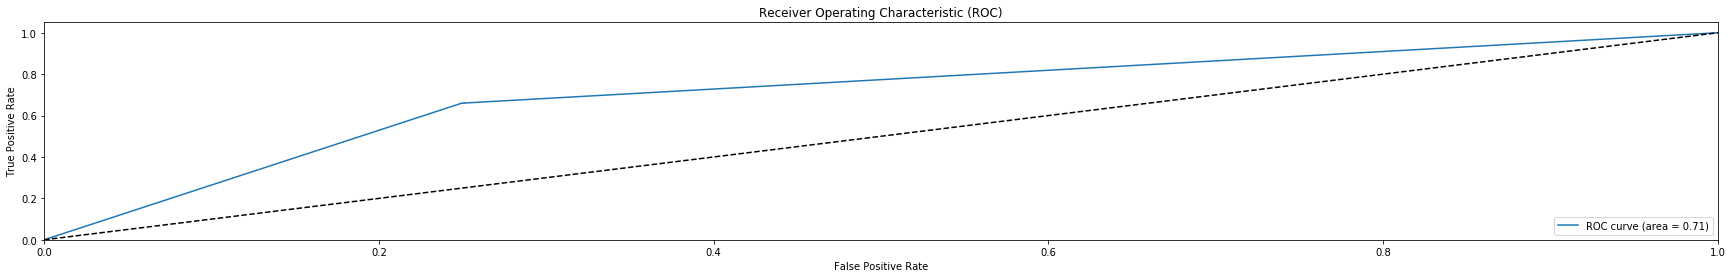

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


pred = model.predict(x_test)
pred = pred[:,1] 
plot_roc(pred,y_true)